# Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. 
In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed 
because they had unknown values for the "mpg" attribute. The original dataset is available in the file 
"auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete
and 5 continuous attributes." (Quinlan, 1993)

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)
    
So here we will predict the mpg based on other attributes, so we will go for Regression technique.

# 1-Data Exploration (Reading the data and attributes name)

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
#lets import the uscovid data
autompg_init=pd.read_csv('autompg.csv')
print(autompg_init.shape)
print(autompg_init.head())

(398, 9)
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                     car name  
0       1  chevrolet chevelle malibu    
1       1          buick skylark 320    
2       1        plymouth satellite     
3       1              amc rebel sst    
4       1               ford torino     


# 2-Exploratory Data Analysis (Exploring, Imputing, Cleaning & Visualizing)

In [39]:
#checking the information of the data
autompg_init.info()

#so by looking the information, here there are some missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [41]:
#here the horsepower attribute is showing as object, so lets see what are the types of data are present
print(np.unique(autompg_init['horsepower'], return_counts=True))
print(autompg_init['horsepower'].value_counts())


(array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object), array([17,  1,  1, 12,  1,  1, 18,  3,  1,  5,  1,  4,  1,  3,  2,  5,  1,
        1,  1,  1,  1,  2,  7,  1,  7,  1,  1, 22,  1,  2,  2,  1,  2,  4,
        1,  5,  5,  5,  3,  1,  2,  1,  1,  1,  3,  1,  3,  1,  2,  3,  1,
        4,  2,  1,  2,  5,  1,  2,  3,  1, 10,  1, 12,  6,  3, 12,  5,  6,
  

In [44]:
#here there are some missing values are marked with '?' mark. Lets convert it to NaN.
autompg_init = autompg_init.replace({'?':np.NaN})
print(autompg_init.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [47]:
#so here the horsepower attribute is showing as object, so lets convert that to float for average calculation
autompg_init['horsepower'] = autompg_init['horsepower'].astype(float)

#again checking the information of the data
autompg_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [49]:
#lets see the data descrption for horsepower
print(autompg_init['horsepower'].describe())

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64


In [50]:
#lets fill horsepower missing value with the average value wrt std dev.
for dataset in autompg_init:
    mean = autompg_init['horsepower'].mean()
    std = autompg_init['horsepower'].std()
    is_null = autompg_init['horsepower'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    missval = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in horsepower column
    fillval = autompg_init["horsepower"].copy()
    fillval[np.isnan(fillval)] = missval
    autompg_init["horsepower"] = fillval
    autompg_init["horsepower"] = autompg_init["horsepower"].astype(float)

#again check for horsepower attribute after missing value replacement
print(autompg_init['horsepower'].describe())

count    398.000000
mean     104.379397
std       38.276263
min       46.000000
25%       76.000000
50%       93.500000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64


In [52]:
#again checking the information of the data
autompg_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


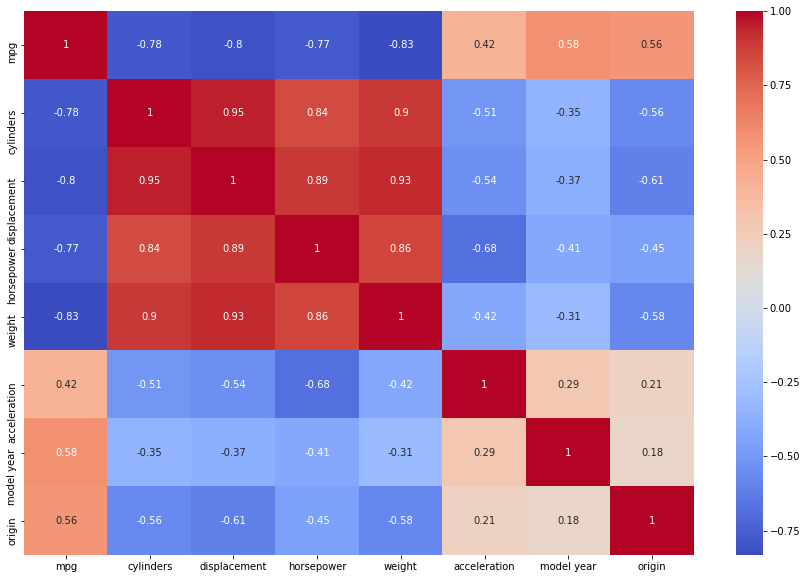

In [53]:
#lets see the corelation among data
plt.figure(figsize=(15,10))
sns.heatmap(autompg_init.corr(),cmap='coolwarm',annot=True)

#so by looking the corelation of data, we can say that mpg is highly dependent on model year, origin and acceleartion.

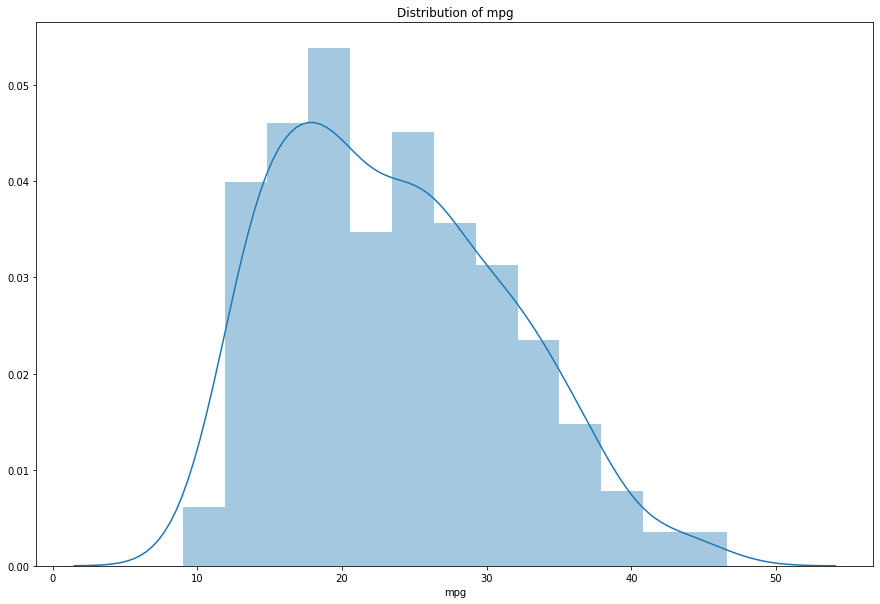

In [59]:
# now lets see the distribution of "mpg"
plt.figure(figsize=(15,10))
plt.title('Distribution of mpg')
sns.distplot(autompg_init['mpg'])

Text(0.5, 1.0, 'mpg changes wrt cylinders')

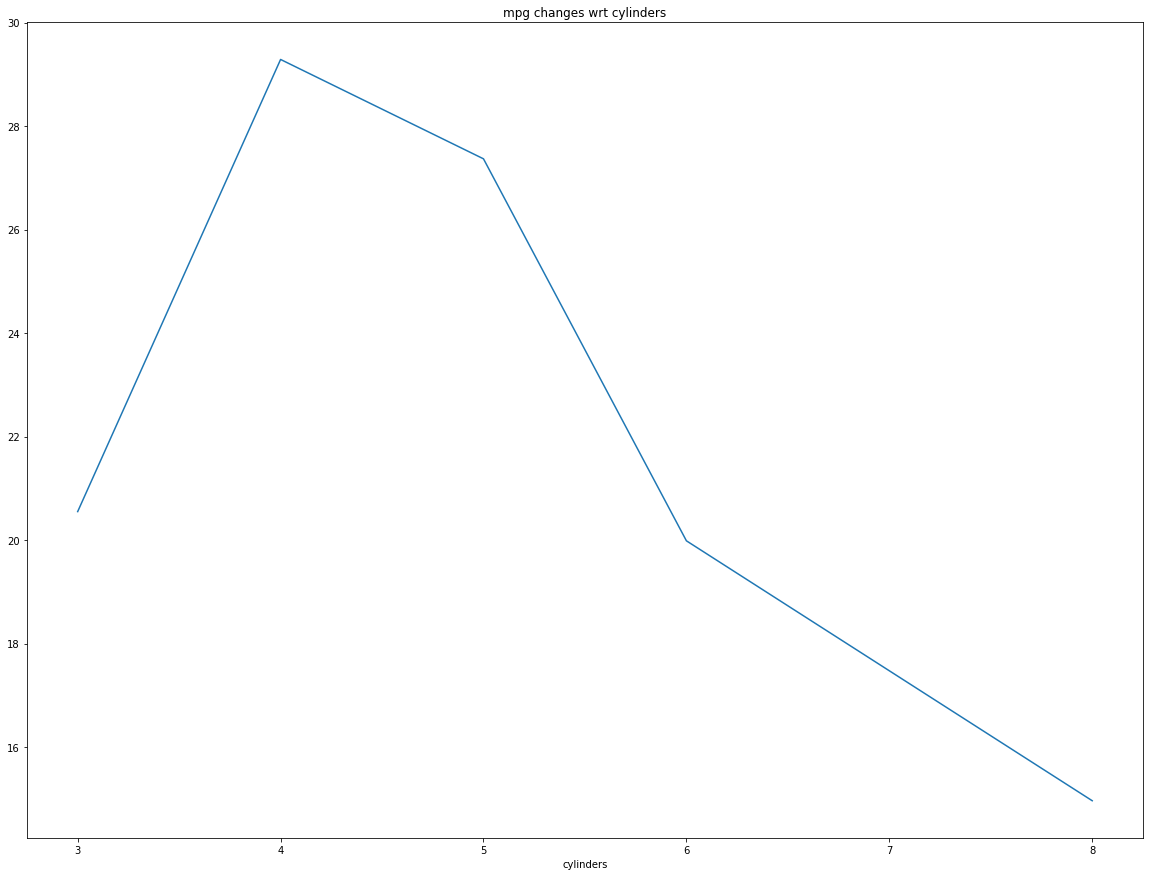

In [60]:
# now lets see the distribution of "mpg" changes wrt cylinders
bycylinders=autompg_init.groupby('cylinders').mean()
plt.figure(figsize=(20,15))
bycylinders['mpg'].plot()
plt.title('mpg changes wrt cylinders')

#so by looking this plot we can say that the mpg is decreasing as the cylinders increases.

Text(0.5, 1.0, 'mpg changes wrt horsepower')

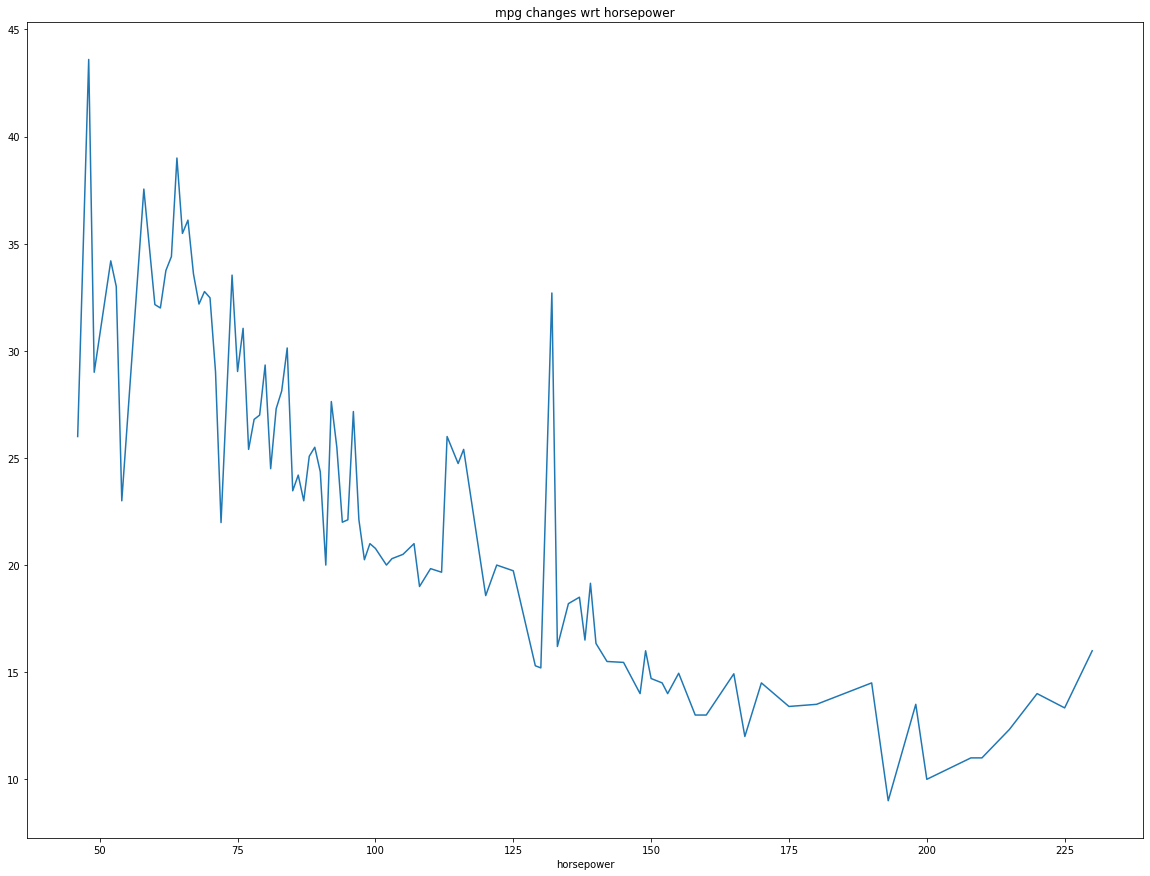

In [62]:
# now lets see the distribution of "mpg" changes wrt horsepower
byhorsepower=autompg_init.groupby('horsepower').mean()
plt.figure(figsize=(20,15))
byhorsepower['mpg'].plot()
plt.title('mpg changes wrt horsepower')

#so by looking this plot we can say that the mpg is decreasing as the horsepower increases.

Text(0.5, 1.0, 'mpg changes wrt model year')

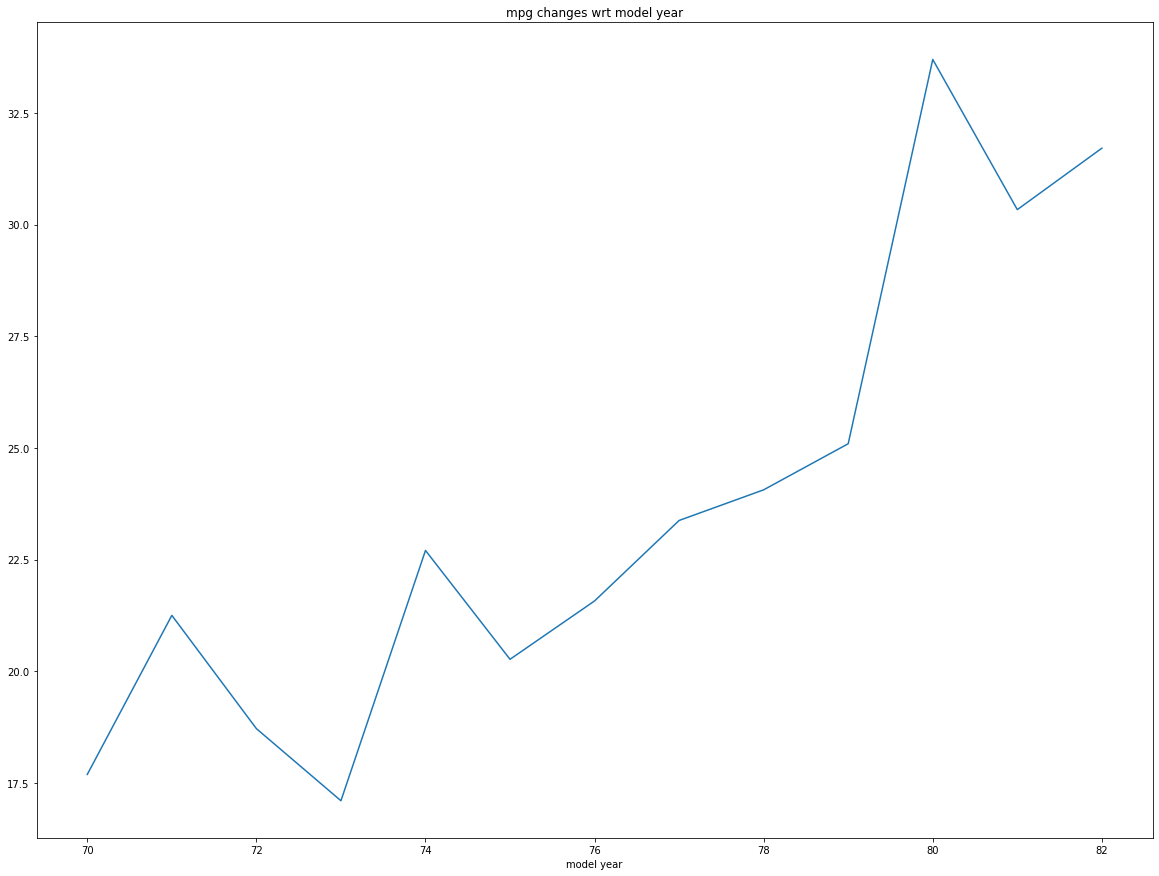

In [63]:
# now lets see the distribution of "mpg" changes wrt model year
bymodelyear=autompg_init.groupby('model year').mean()
plt.figure(figsize=(20,15))
bymodelyear['mpg'].plot()
plt.title('mpg changes wrt model year')

#so by looking this plot we can say that the mpg is increasing as the model year increases.

Text(0.5, 1.0, 'mpg changes wrt acceleration')

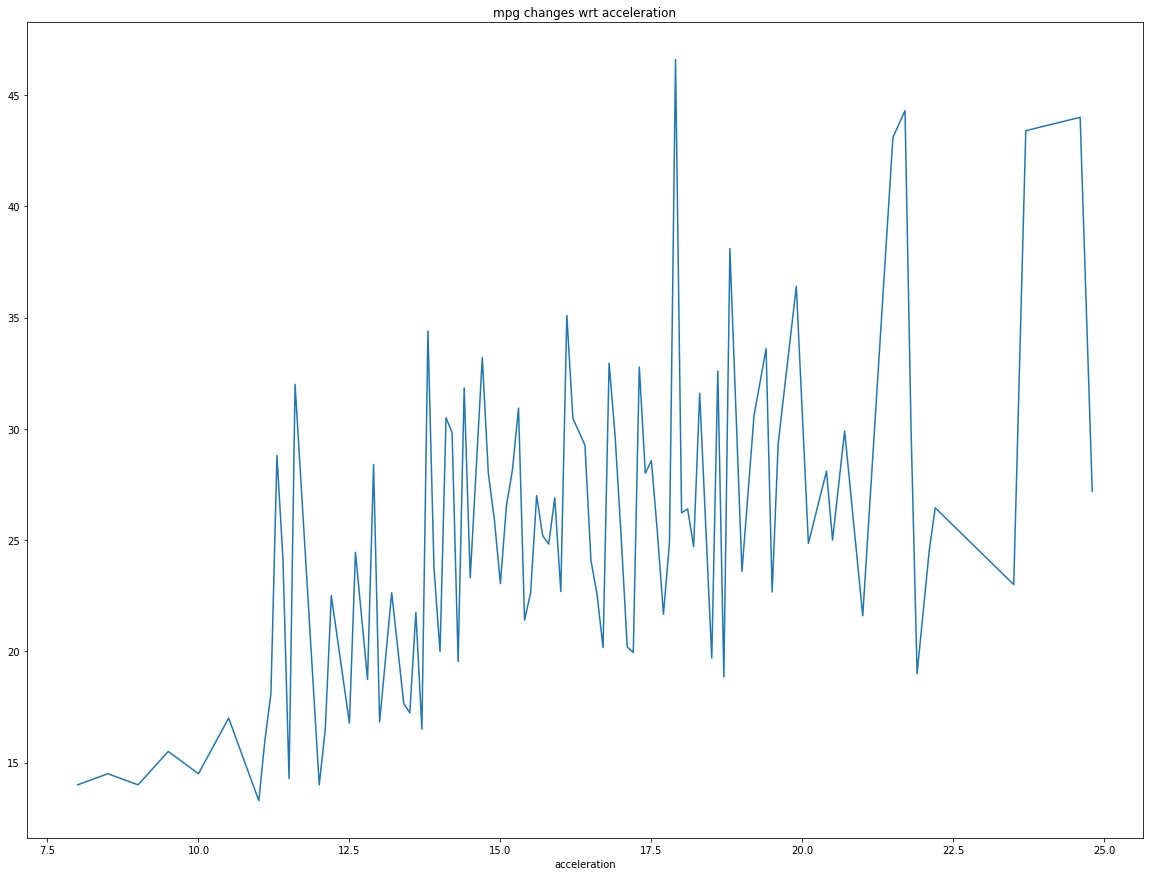

In [64]:
# now lets see the distribution of "mpg" changes wrt acceleration
byacceleration=autompg_init.groupby('acceleration').mean()
plt.figure(figsize=(20,15))
byacceleration['mpg'].plot()
plt.title('mpg changes wrt acceleration')

#so by looking this plot we can say that the mpg is increasing as the acceleration increases.

In [65]:
#so here for our model building we willl not include car name attribute, so lets drop that attribute from dataset
autompg=autompg_init.drop(['car name'],axis=1)
print(autompg.shape)
print(autompg.head())

(398, 8)
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


In [66]:
# separating the input and output/target variables
df_x=autompg.drop(columns=['mpg'])
y=autompg[['mpg']]

print(df_x.shape)
print(y.shape)

(398, 7)
(398, 1)


In [67]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

# 3-Building Different Model and Finding the Best Model

In [70]:
#lets print the shape of both input and target dataset
print(x.shape)
print(y.shape)

(398, 7)
(398, 1)


In [71]:
#defining the models which will be used for model building
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.linear_model import Lasso
lsreg=Lasso()
from sklearn.linear_model import Ridge
lrreg=Ridge()
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [72]:
#appending all the models
models=[]
models.append(('LinearRegression',lreg))
models.append(('KNeighborsRegressor',knn))
models.append(('Lasso',lsreg))
models.append(('Ridge',lrreg))
models.append(('GradientBoostingRegressor',gbr))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rf))

In [73]:
#printing the output of each model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Model=[]
RState=[]
score=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    max_r2_score=0.0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr
            final_r_state=r_state
    print('Final Random State is:', final_r_state)
    print('\n')
    RState.append(final_r_state*1)
    print('R2 Score is:', max_r2_score)
    print('\n')
    score.append(max_r2_score*100)
    print('\n')

************************ LinearRegression **********************


Final Random State is: 91


R2 Score is: 0.8701595117517529




************************ KNeighborsRegressor **********************


Final Random State is: 78


R2 Score is: 0.9018569043012901




************************ Lasso **********************


Final Random State is: 91


R2 Score is: 0.856858762890637




************************ Ridge **********************


Final Random State is: 91


R2 Score is: 0.8721129201767149




************************ GradientBoostingRegressor **********************


Final Random State is: 91


R2 Score is: 0.9348034508090186




************************ AdaBoostRegressor **********************


Final Random State is: 91


R2 Score is: 0.9091815330556641




************************ RandomForestRegressor **********************


Final Random State is: 91


R2 Score is: 0.9250572047943899






In [74]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Random_State':RState,'R2_Score':score})
print(result)

                       Model  Random_State   R2_Score
0           LinearRegression            91  87.015951
1        KNeighborsRegressor            78  90.185690
2                      Lasso            91  85.685876
3                      Ridge            91  87.211292
4  GradientBoostingRegressor            91  93.480345
5          AdaBoostRegressor            91  90.918153
6      RandomForestRegressor            91  92.505720


In [77]:
# So here GradientBoostingClassifier is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor 
gdrreg=GradientBoostingRegressor()
parameters={'learning_rate':[0.01,0.1,0.5,1.0],'n_estimators':[100,200,500],'loss':['ls','lad','huber','quantile']}
clf=GridSearchCV(gdrreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}

In [79]:
# So lets build the final model with 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100 and random_state=91

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=91)
gbrreg=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100,loss='huber')
gbrreg.fit(x_train,y_train)
y_pred=gbrreg.predict(x_test)
print('R2 score is:',r2_score(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score is: 0.9358934138069849
RMSE is: 1.8903622123870545


In [80]:
#checking the mean r2 score and overfitting and underfitting using cross validation
from sklearn.model_selection import cross_val_score
print('Mean R2 score of GradientBoostingRegressor is:', cross_val_score(gbrreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation of GradientBoostingRegressor is:',cross_val_score(gbrreg,x,y,cv=5,scoring='r2').std())

Mean R2 score of GradientBoostingRegressor is: 0.7859798458413547
Standard Deviation of GradientBoostingRegressor is: 0.1462755305537311


In [81]:
#lets predict the Avarage Price value
print('Actual mpg:\n',y_test)
print('Predicted mpg:\n',y_pred)

Actual mpg:
       mpg
390  32.0
367  28.0
124  11.0
204  32.0
248  36.1
..    ...
261  18.1
20   25.0
190  14.5
211  16.5
254  20.2

[80 rows x 1 columns]
Predicted mpg:
 [29.2606404  29.8792138  14.36205939 30.78956804 33.70894881 14.08602266
 13.92686363 23.76364025 25.93803324 12.69398623 28.24580082 34.6152405
 19.60682874 27.82515935 12.45603089 34.15366466 37.13787123 22.23027097
 27.91374007 19.68197077 24.28180198 17.71635843 19.37189097 21.40145281
 35.79554914 34.78666947 28.16759329 27.24573907 25.93683057 21.60678216
 19.4620622  36.86650486 36.16684155 16.11030502 17.4387244  25.68048769
 18.94446715 12.91961078 18.30881792 20.74480148 17.28649121 25.00615414
 17.03263893 15.57554455 20.42751145 25.72201428 13.55149904 20.63140892
 14.26533316 13.8334826  16.41527519 33.70499637 24.12244471 34.836241
 30.93561503 24.48521179 16.06942061 25.10500826 15.8009665  14.15475802
 23.15179542 13.82485605 23.48899962 31.93299642 18.27001108 30.77392502
 28.97967604 24.82370071 28.

In [82]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(gbrreg,'gbrreg_mpg.obj')

['gbrreg_mpg.obj']

In [83]:
# load the model from the file
mpg_from_joblib=joblib.load('gbrreg_mpg.obj')

In [84]:
#Use the loaded model to make predictions against test data
mpg_from_joblib.predict(x_test)

array([29.2606404 , 29.8792138 , 14.36205939, 30.78956804, 33.70894881,
       14.08602266, 13.92686363, 23.76364025, 25.93803324, 12.69398623,
       28.24580082, 34.6152405 , 19.60682874, 27.82515935, 12.45603089,
       34.15366466, 37.13787123, 22.23027097, 27.91374007, 19.68197077,
       24.28180198, 17.71635843, 19.37189097, 21.40145281, 35.79554914,
       34.78666947, 28.16759329, 27.24573907, 25.93683057, 21.60678216,
       19.4620622 , 36.86650486, 36.16684155, 16.11030502, 17.4387244 ,
       25.68048769, 18.94446715, 12.91961078, 18.30881792, 20.74480148,
       17.28649121, 25.00615414, 17.03263893, 15.57554455, 20.42751145,
       25.72201428, 13.55149904, 20.63140892, 14.26533316, 13.8334826 ,
       16.41527519, 33.70499637, 24.12244471, 34.836241  , 30.93561503,
       24.48521179, 16.06942061, 25.10500826, 15.8009665 , 14.15475802,
       23.15179542, 13.82485605, 23.48899962, 31.93299642, 18.27001108,
       30.77392502, 28.97967604, 24.82370071, 28.68424919, 19.87

# Conclusion:
    
So here 'GradientBoostingRegressor Model' is the best model out of all model tested above and by looking this we can
conclude that our model is predicting nearly 94% of correct results for predicting the mpg of Auto.